In [1]:
# Model Training - Customer Churn Prediction
# This notebook trains multiple models and selects the best performer

# Step 1: Setup
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from src.preprocessing import load_data, split_data, build_preprocessor
from src.modeling import (
    create_model_pipeline,
    train_model,
    evaluate_model,
    optimize_threshold,
    save_model,
    compare_models,
    get_best_model
)
from src.config import MODELS, BEST_MODEL_FILE

sns.set_style("whitegrid")
print("✅ Setup complete")


⚠️ LightGBM not available
✅ Setup complete


In [2]:
# Step 2: Load and Split Data
print("="*70)
print("DATA LOADING AND SPLITTING")
print("="*70)

df = load_data()
X_train, X_test, y_train, y_test = split_data(df)

print(f"\nDataset split:")
print(f"  Training:   {X_train.shape[0]:,} samples")
print(f"  Test:       {X_test.shape[0]:,} samples")
print(f"  Features:   {X_train.shape[1]}")

print(f"\nClass distribution (training):")
print(y_train.value_counts())
print(f"Churn rate: {y_train.mean():.2%}")


DATA LOADING AND SPLITTING
✅ Loaded data: (200000, 11)
✅ Data split complete:
   Train: (160000, 9)
   Test:  (40000, 9)
   Train churn rate: 43.50%
   Test churn rate:  43.50%

Dataset split:
  Training:   160,000 samples
  Test:       40,000 samples
  Features:   9

Class distribution (training):
Churn
0    90398
1    69602
Name: count, dtype: int64
Churn rate: 43.50%


In [3]:
# Step 3: Build Preprocessing Pipeline
print("\n" + "="*70)
print("PREPROCESSING PIPELINE")
print("="*70)

preprocessor = build_preprocessor()
print("✅ Preprocessor ready")



PREPROCESSING PIPELINE
✅ Preprocessor built:
   - Numerical features: 6
   - Categorical features: 3
   - Scaling: standard
   - Encoding: onehot
✅ Preprocessor ready


In [4]:
# Step 4: Train Logistic Regression
print("\n" + "="*70)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*70)

lr_pipeline = create_model_pipeline(preprocessor, "logistic_regression")
lr_pipeline = train_model(lr_pipeline, X_train, y_train)
lr_metrics = evaluate_model(lr_pipeline, X_test, y_test)

# Save model
save_model(lr_pipeline, "logistic_regression", lr_metrics, 
           metadata={"description": "Baseline logistic regression model"})



MODEL 1: LOGISTIC REGRESSION
Training LogisticRegression...
✅ Training complete

MODEL EVALUATION
Accuracy:   0.7377
Precision:  0.6657
Recall:     0.7976
F1-Score:   0.7257
ROC-AUC:    0.8311
Threshold:  0.50

Confusion Matrix:
TN: 15,629  |  FP:  6,970
FN:  3,522  |  TP: 13,879

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.69      0.75     22599
       Churn       0.67      0.80      0.73     17401

    accuracy                           0.74     40000
   macro avg       0.74      0.74      0.74     40000
weighted avg       0.75      0.74      0.74     40000

💾 Model saved: C:\Users\shali\Documents\shalin\google\churn-prediction-system\models\logistic_regression.pkl


WindowsPath('C:/Users/shali/Documents/shalin/google/churn-prediction-system/models/logistic_regression.pkl')

In [5]:
# Step 5: Train Random Forest
print("\n" + "="*70)
print("MODEL 2: RANDOM FOREST")
print("="*70)

rf_pipeline = create_model_pipeline(preprocessor, "random_forest")
rf_pipeline = train_model(rf_pipeline, X_train, y_train)
rf_metrics = evaluate_model(rf_pipeline, X_test, y_test)

# Save model
save_model(rf_pipeline, "random_forest", rf_metrics,
           metadata={"description": "Random forest with class balancing"})



MODEL 2: RANDOM FOREST
Training RandomForestClassifier...
✅ Training complete

MODEL EVALUATION
Accuracy:   0.7423
Precision:  0.6721
Recall:     0.7959
F1-Score:   0.7288
ROC-AUC:    0.8352
Threshold:  0.50

Confusion Matrix:
TN: 15,843  |  FP:  6,756
FN:  3,551  |  TP: 13,850

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.70      0.75     22599
       Churn       0.67      0.80      0.73     17401

    accuracy                           0.74     40000
   macro avg       0.74      0.75      0.74     40000
weighted avg       0.75      0.74      0.74     40000

💾 Model saved: C:\Users\shali\Documents\shalin\google\churn-prediction-system\models\random_forest.pkl


WindowsPath('C:/Users/shali/Documents/shalin/google/churn-prediction-system/models/random_forest.pkl')

In [6]:
# Step 6: Train XGBoost
print("\n" + "="*70)
print("MODEL 3: XGBOOST")
print("="*70)

try:
    xgb_pipeline = create_model_pipeline(preprocessor, "xgboost")
    xgb_pipeline = train_model(xgb_pipeline, X_train, y_train)
    xgb_metrics = evaluate_model(xgb_pipeline, X_test, y_test)
    
    save_model(xgb_pipeline, "xgboost", xgb_metrics,
               metadata={"description": "XGBoost gradient boosting model"})
    
except ImportError:
    print("⚠️ XGBoost not available, skipping...")
    xgb_metrics = None



MODEL 3: XGBOOST
Training XGBClassifier...
✅ Training complete

MODEL EVALUATION
Accuracy:   0.6905
Precision:  0.5911
Recall:     0.9362
F1-Score:   0.7246
ROC-AUC:    0.8369
Threshold:  0.50

Confusion Matrix:
TN: 11,328  |  FP: 11,271
FN:  1,111  |  TP: 16,290

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.50      0.65     22599
       Churn       0.59      0.94      0.72     17401

    accuracy                           0.69     40000
   macro avg       0.75      0.72      0.69     40000
weighted avg       0.77      0.69      0.68     40000

💾 Model saved: C:\Users\shali\Documents\shalin\google\churn-prediction-system\models\xgboost.pkl


In [7]:
# Step 7: Train LightGBM
print("\n" + "="*70)
print("MODEL 4: LIGHTGBM")
print("="*70)

try:
    lgb_pipeline = create_model_pipeline(preprocessor, "lightgbm")
    lgb_pipeline = train_model(lgb_pipeline, X_train, y_train)
    lgb_metrics = evaluate_model(lgb_pipeline, X_test, y_test)
    
    save_model(lgb_pipeline, "lightgbm", lgb_metrics,
               metadata={"description": "LightGBM gradient boosting model"})
    
except ImportError:
    print("⚠️ LightGBM not available, skipping...")
    lgb_metrics = None



MODEL 4: LIGHTGBM
⚠️ LightGBM not available, skipping...


In [8]:
# Step 8: Compare All Models
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

comparison_df = compare_models()
print("\nPerformance metrics:")
print(comparison_df[['model_name', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']].to_string(index=False))



MODEL COMPARISON

Performance metrics:
         model_name  accuracy  precision   recall       f1  roc_auc
            xgboost  0.690450   0.591053 0.936153 0.724612 0.836919
         best_model  0.732525   0.647647 0.844722 0.733172 0.836919
      random_forest  0.742325   0.672134 0.795931 0.728813 0.835167
logistic_regression  0.737700   0.665691 0.797598 0.725699 0.831125


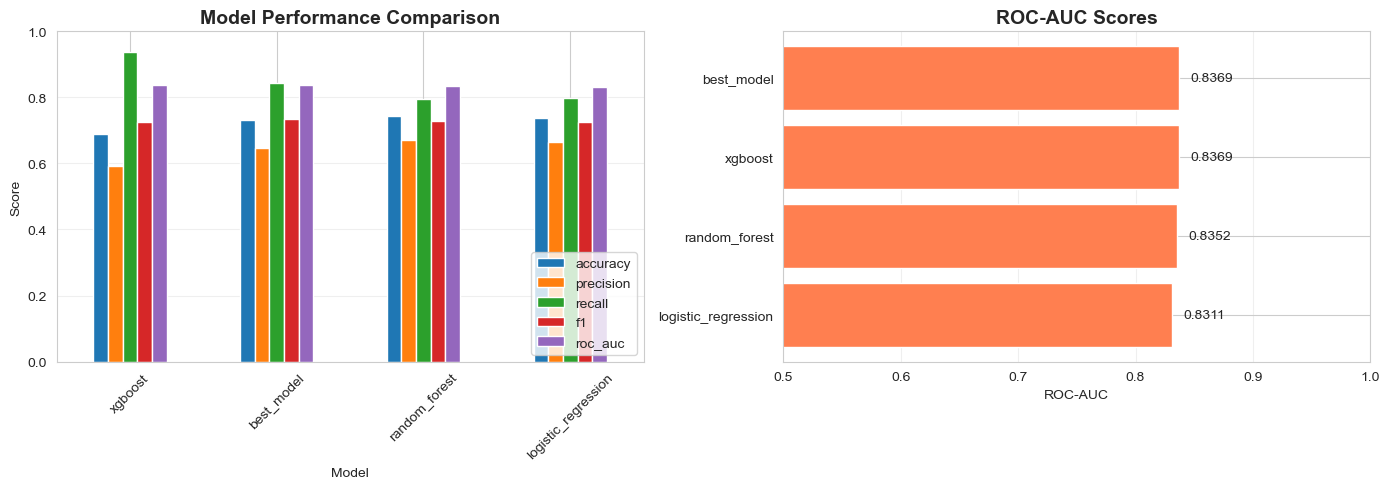

In [9]:
# Step 9: Visualize Model Comparison
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
comparison_df.set_index('model_name')[metrics_to_plot].plot(kind='bar', ax=axes[0])
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Model')
axes[0].legend(loc='lower right')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 1)
axes[0].grid(alpha=0.3, axis='y')

# ROC-AUC comparison
roc_auc_sorted = comparison_df.sort_values('roc_auc', ascending=True)
axes[1].barh(roc_auc_sorted['model_name'], roc_auc_sorted['roc_auc'], color='coral')
axes[1].set_title('ROC-AUC Scores', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ROC-AUC')
axes[1].set_xlim(0.5, 1.0)
axes[1].grid(alpha=0.3, axis='x')

for i, v in enumerate(roc_auc_sorted['roc_auc'].values):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()


In [10]:
# Step 10: Select Best Model
print("\n" + "="*70)
print("BEST MODEL SELECTION")
print("="*70)

best_name, best_info = get_best_model()

print(f"\n🏆 Best Model: {best_name}")
print(f"\nPerformance:")
for metric, value in best_info['metrics'].items():
    print(f"  {metric:12s}: {value:.4f}")

print(f"\nTrained: {best_info['timestamp']}")



BEST MODEL SELECTION

🏆 Best Model: xgboost

Performance:
  accuracy    : 0.6905
  precision   : 0.5911
  recall      : 0.9362
  f1          : 0.7246
  roc_auc     : 0.8369
  threshold   : 0.5000

Trained: 2025-12-16T14:09:56.298782


In [11]:
# Step 11: Threshold Optimization on Best Model
print("\n" + "="*70)
print("THRESHOLD OPTIMIZATION")
print("="*70)

# Load best model
from src.modeling import load_model
best_model = load_model(best_name)

# Create validation split from training data
# DON'T use split_data() because X_train doesn't have CustomerID/Churn anymore
from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.15,
    random_state=42,
    stratify=y_train
)

print(f"Validation split: {X_val.shape[0]} samples")

print("\nOptimizing threshold for F1-score...")
best_threshold, best_f1 = optimize_threshold(
    best_model, X_val, y_val, 
    metric="f1"
)

# Evaluate with optimized threshold
print("\n" + "="*70)
print(f"BEST MODEL WITH OPTIMIZED THRESHOLD ({best_threshold:.3f})")
print("="*70)

optimized_metrics = evaluate_model(best_model, X_test, y_test, threshold=best_threshold)


THRESHOLD OPTIMIZATION
📦 Model loaded: C:\Users\shali\Documents\shalin\google\churn-prediction-system\models\xgboost.pkl
Validation split: 24000 samples

Optimizing threshold for F1-score...

🎯 Optimal threshold: 0.650
   F1: 0.7461
   Improvement from 0.5: +1.5%

BEST MODEL WITH OPTIMIZED THRESHOLD (0.650)

MODEL EVALUATION
Accuracy:   0.7325
Precision:  0.6476
Recall:     0.8447
F1-Score:   0.7332
ROC-AUC:    0.8369
Threshold:  0.65

Confusion Matrix:
TN: 14,602  |  FP:  7,997
FN:  2,702  |  TP: 14,699

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.65      0.73     22599
       Churn       0.65      0.84      0.73     17401

    accuracy                           0.73     40000
   macro avg       0.75      0.75      0.73     40000
weighted avg       0.76      0.73      0.73     40000




Visualizing threshold impact...


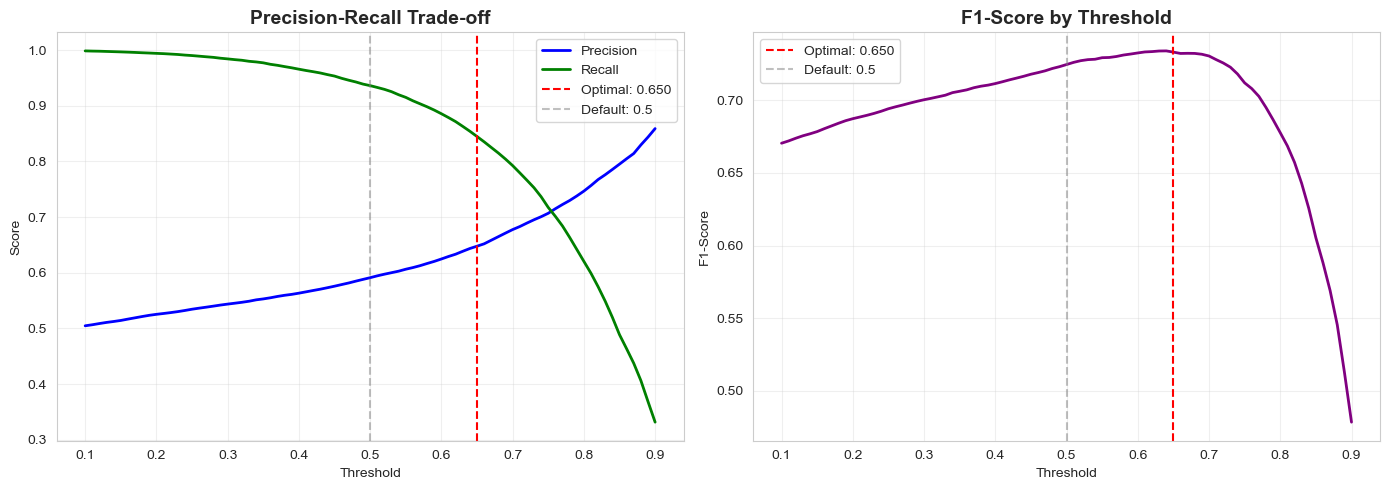

In [12]:
# Step 12: Visualize Threshold Impact
print("\nVisualizing threshold impact...")

# Get predictions for different thresholds
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.1, 0.9, 81)

from sklearn.metrics import precision_score, recall_score, f1_score

precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Precision-Recall trade-off
axes[0].plot(thresholds, precisions, label='Precision', linewidth=2, color='blue')
axes[0].plot(thresholds, recalls, label='Recall', linewidth=2, color='green')
axes[0].axvline(best_threshold, color='red', linestyle='--', label=f'Optimal: {best_threshold:.3f}')
axes[0].axvline(0.5, color='gray', linestyle='--', alpha=0.5, label='Default: 0.5')
axes[0].set_title('Precision-Recall Trade-off', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Score')
axes[0].legend()
axes[0].grid(alpha=0.3)

# F1-score optimization
axes[1].plot(thresholds, f1_scores, linewidth=2, color='purple')
axes[1].axvline(best_threshold, color='red', linestyle='--', label=f'Optimal: {best_threshold:.3f}')
axes[1].axvline(0.5, color='gray', linestyle='--', alpha=0.5, label='Default: 0.5')
axes[1].set_title('F1-Score by Threshold', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('F1-Score')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



FEATURE IMPORTANCE

Top 20 Most Important Features:
            feature  importance
  x1_Month-to-month    0.498483
        x1_Two year    0.191416
        x1_One year    0.191030
                 x1    0.041226
x2_Electronic check    0.013237
                 x4    0.013010
                 x5    0.010572
                 x2    0.010298
   x2_Bank transfer    0.009781
                 x0    0.005446
                 x3    0.005232
     x2_Credit card    0.002831
    x2_Mailed check    0.002524
          x0_Female    0.002506
            x0_Male    0.002407


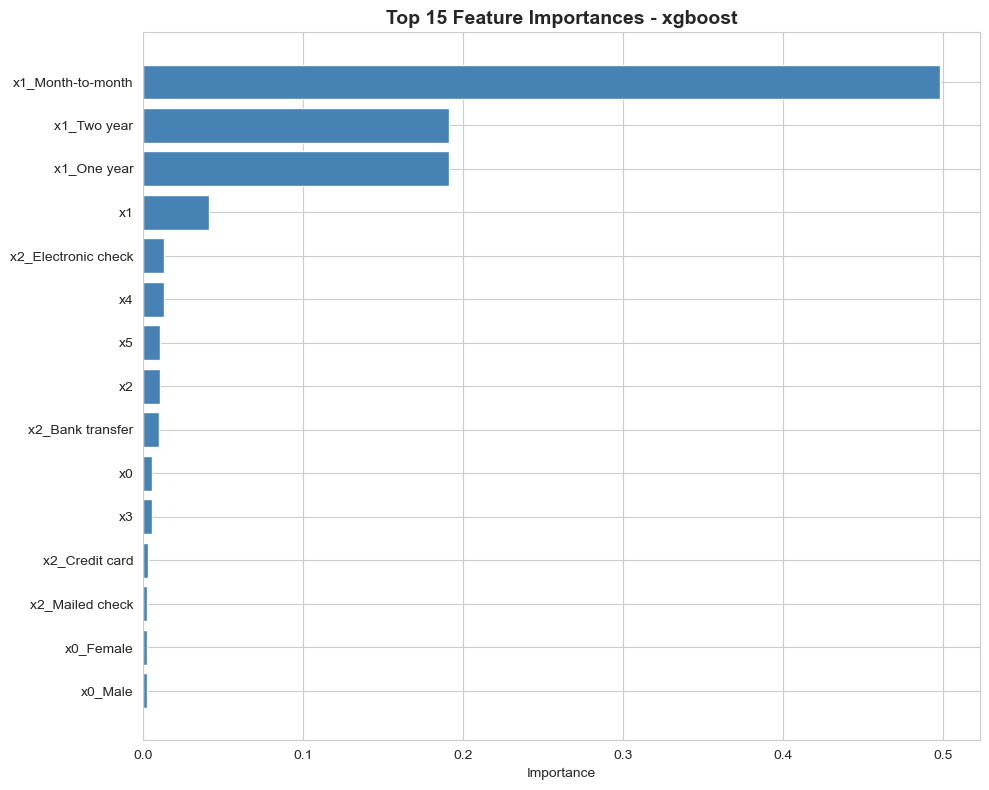


FEATURE IMPORTANCE BY ORIGINAL FEATURE

Aggregated Feature Importance:
       feature  total_importance
      Contract          0.880930
        Tenure          0.041226
 PaymentMethod          0.028373
SupportTickets          0.013010
    UsageScore          0.010572
MonthlyCharges          0.010298
           Age          0.005446
  TotalCharges          0.005232
        Gender          0.004913


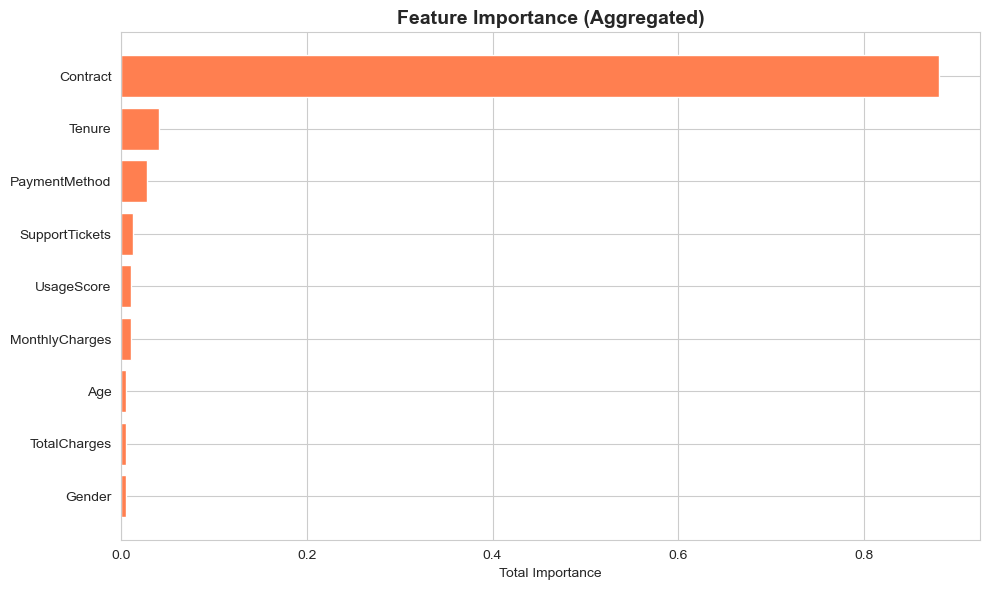

In [13]:
# Step 13: Feature Importance (for tree-based models)
if best_name in ['random_forest', 'xgboost', 'lightgbm']:
    print("\n" + "="*70)
    print("FEATURE IMPORTANCE")
    print("="*70)
    
    # Get feature importances
    model = best_model.named_steps['model']
    importances = model.feature_importances_
    
    try:
        # Get feature names from preprocessor
        preprocessor_step = best_model.named_steps['preprocessor']
        
        # Numerical features
        num_features = list(preprocessor_step.named_transformers_['num']
                           .named_steps['scaler'].get_feature_names_out())
        
        # Categorical features  
        cat_features = list(preprocessor_step.named_transformers_['cat']
                           .named_steps['encoder'].get_feature_names_out())
        
        feature_names = num_features + cat_features
        
        # IMPORTANT: Handle shape mismatch
        if len(feature_names) != len(importances):
            print(f"⚠️ Feature name mismatch: {len(feature_names)} names vs {len(importances)} importances")
            print(f"Using generic feature names instead")
            feature_names = [f"feature_{i}" for i in range(len(importances))]
        
        # Create DataFrame
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("\nTop 20 Most Important Features:")
        print(importance_df.head(20).to_string(index=False))
        
        # Plot top features
        plt.figure(figsize=(10, 8))
        top_n = min(20, len(importance_df))  # Handle case with fewer features
        top_features = importance_df.head(top_n)
        
        plt.barh(range(top_n), top_features['importance'].values, color='steelblue')
        plt.yticks(range(top_n), top_features['feature'].values)
        plt.xlabel('Importance')
        plt.title(f'Top {top_n} Feature Importances - {best_name}', 
                 fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        # Show feature importance by original feature (aggregate encoded categoricals)
        print("\n" + "="*70)
        print("FEATURE IMPORTANCE BY ORIGINAL FEATURE")
        print("="*70)
        
        # Group categorical features
        feature_groups = {}
        for feat, imp in zip(feature_names, importances):
            if feat.startswith('x0_'):
                base = 'Gender'
            elif feat.startswith('x1_'):
                base = 'Contract'
            elif feat.startswith('x2_'):
                base = 'PaymentMethod'
            elif feat == 'x0':
                base = 'Age'
            elif feat == 'x1':
                base = 'Tenure'
            elif feat == 'x2':
                base = 'MonthlyCharges'
            elif feat == 'x3':
                base = 'TotalCharges'
            elif feat == 'x4':
                base = 'SupportTickets'
            elif feat == 'x5':
                base = 'UsageScore'
            else:
                base = feat
            
            if base not in feature_groups:
                feature_groups[base] = 0
            feature_groups[base] += imp
        
        # Create grouped importance DataFrame
        grouped_importance = pd.DataFrame([
            {'feature': k, 'total_importance': v} 
            for k, v in feature_groups.items()
        ]).sort_values('total_importance', ascending=False)
        
        print("\nAggregated Feature Importance:")
        print(grouped_importance.to_string(index=False))
        
        # Plot grouped importance
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(grouped_importance)), grouped_importance['total_importance'].values, 
                color='coral')
        plt.yticks(range(len(grouped_importance)), grouped_importance['feature'].values)
        plt.xlabel('Total Importance')
        plt.title('Feature Importance (Aggregated)', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"⚠️ Could not extract detailed feature importances: {e}")
        print("\nShowing raw feature importances:")
        
        # Fallback: just show top importances without names
        importance_df = pd.DataFrame({
            'feature_index': range(len(importances)),
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print(importance_df.head(20).to_string(index=False))

In [14]:
# Step 14: Save Best Model as Production Model
import joblib
import shutil

print("\n" + "="*70)
print("SAVING PRODUCTION MODEL")
print("="*70)

# Save with optimized threshold in metadata
production_metadata = {
    "model_type": best_name,
    "optimal_threshold": float(best_threshold),
    "metrics_default_threshold": best_info['metrics'],
    "metrics_optimal_threshold": optimized_metrics,
    "trained_on": best_info['timestamp'],
    "description": "Production model with optimized threshold"
}

# Save as best_model
save_model(best_model, "best_model", optimized_metrics, metadata=production_metadata)

# Also save to standard location
joblib.dump(best_model, BEST_MODEL_FILE)
print(f"💾 Production model saved to: {BEST_MODEL_FILE}")

# Step 15: Training Summary
print("\n" + "="*70)
print("TRAINING SUMMARY")
print("="*70)

n_models = len(comparison_df)
best_auc = comparison_df['roc_auc'].max()
improvement = (best_auc - comparison_df['roc_auc'].min()) / comparison_df['roc_auc'].min() * 100

default_f1 = best_info['metrics']['f1']
optimized_f1 = optimized_metrics['f1']
threshold_improvement = (optimized_f1 - default_f1) / default_f1 * 100

summary = f"""
TRAINING RESULTS:
-----------------
✓ Models trained: {n_models}
✓ Best model: {best_name}
✓ Best ROC-AUC: {best_auc:.4f}
✓ Performance range: {comparison_df['roc_auc'].min():.4f} - {best_auc:.4f}
✓ Model improvement: {improvement:.1f}%

THRESHOLD OPTIMIZATION:
-----------------------
✓ Default threshold (0.5): F1 = {default_f1:.4f}
✓ Optimal threshold ({best_threshold:.3f}): F1 = {optimized_f1:.4f}
✓ F1 improvement: {threshold_improvement:+.1f}%

PRODUCTION MODEL:
-----------------
✓ Model: {best_name}
✓ Threshold: {best_threshold:.3f}
✓ ROC-AUC: {optimized_metrics['roc_auc']:.4f}
✓ F1-Score: {optimized_metrics['f1']:.4f}
✓ Precision: {optimized_metrics['precision']:.4f}
✓ Recall: {optimized_metrics['recall']:.4f}

NEXT STEPS:
-----------
→ Model evaluation and SHAP analysis (notebook 04)
→ Business impact analysis (notebook 05)
→ Deploy via API
"""

print(summary)

print("\n✅ Model Training Complete!")
print("📊 Next step: Model Evaluation & Explainability (notebook 04)")


SAVING PRODUCTION MODEL
💾 Model saved: C:\Users\shali\Documents\shalin\google\churn-prediction-system\models\best_model.pkl
💾 Production model saved to: C:\Users\shali\Documents\shalin\google\churn-prediction-system\models\best_model.pkl

TRAINING SUMMARY

TRAINING RESULTS:
-----------------
✓ Models trained: 4
✓ Best model: xgboost
✓ Best ROC-AUC: 0.8369
✓ Performance range: 0.8311 - 0.8369
✓ Model improvement: 0.7%

THRESHOLD OPTIMIZATION:
-----------------------
✓ Default threshold (0.5): F1 = 0.7246
✓ Optimal threshold (0.650): F1 = 0.7332
✓ F1 improvement: +1.2%

PRODUCTION MODEL:
-----------------
✓ Model: xgboost
✓ Threshold: 0.650
✓ ROC-AUC: 0.8369
✓ F1-Score: 0.7332
✓ Precision: 0.6476
✓ Recall: 0.8447

NEXT STEPS:
-----------
→ Model evaluation and SHAP analysis (notebook 04)
→ Business impact analysis (notebook 05)
→ Deploy via API


✅ Model Training Complete!
📊 Next step: Model Evaluation & Explainability (notebook 04)
